# Feature Bagging

Демонстрация основана на примере Feature Bagging в документации PyOD

https://github.com/yzhao062/pyod/blob/master/examples/feature_bagging_example.py


Установка необходимых пакетов

In [ ]:
!pip install pyod -q
!pip install combo -q

Импорт FeatureBagging

In [ ]:
from pyod.models.feature_bagging import FeatureBagging

Импорт вспомогательных функций генерации данных и визуализации

In [ ]:
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

Задание параметров генерации данных

In [ ]:
contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

Генерация данных

In [ ]:
# Generate sample data
X_train, y_train, X_test, y_test = \
    generate_data(n_train=n_train,
                    n_test=n_test,
                    n_features=2,
                    contamination=contamination,
                    random_state=42)
#X_train, y_train

/usr/local/lib/python3.7/dist-packages/pyod/utils/data.py:212: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.9.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


Обучение FeatureBagging

In [ ]:
# train Feature Bagging detector
clf = FeatureBagging(check_estimator=False)
clf.fit(X_train)

FeatureBagging(base_estimator=None, bootstrap_features=False,
        check_detector=True, check_estimator=False, combination='average',
        contamination=0.1, estimator_params={}, max_features=1.0,
        n_estimators=10, n_jobs=1, random_state=None, verbose=0)

In [ ]:
# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

In [ ]:
# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

In [ ]:
# evaluate and print the results
print("On Training Data:")
evaluate_print('FeatureBagging', y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print('FeatureBagging', y_test, y_test_scores)

On Training Data:
FeatureBagging ROC:1.0, precision @ rank n:1.0

On Test Data:
FeatureBagging ROC:1.0, precision @ rank n:1.0


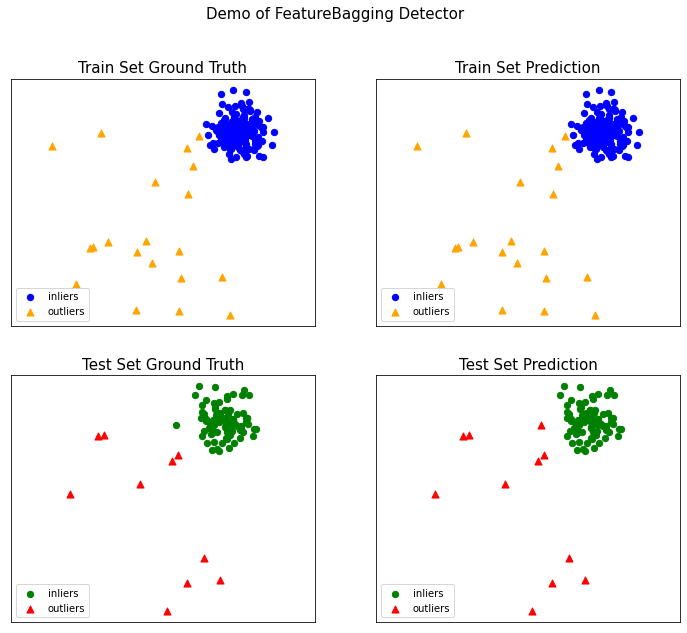

In [ ]:
# visualize the results
visualize('FeatureBagging', X_train, y_train, X_test, y_test, y_train_pred,
            y_test_pred, show_figure=True, save_figure=False)